In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from google.colab import files 
import io
uploaded = files.upload()

df = pd.read_excel (io.BytesIO(uploaded['PCA.xlsx']))
print(df.head())

Saving PCA (FIX).xlsx to PCA (FIX) (1).xlsx
   principal component 1  principal component 2
0               3.239836              -0.091442
1               0.450831              -1.586577
2               3.239836              -0.091442
3               3.239836              -0.091442
4               1.223224              -1.783879


In [ ]:
df.info()
x = df.iloc[:, [0,1]].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   principal component 1  280 non-null    float64
 1   principal component 2  280 non-null    float64
dtypes: float64(2)
memory usage: 4.5 KB


In [ ]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)

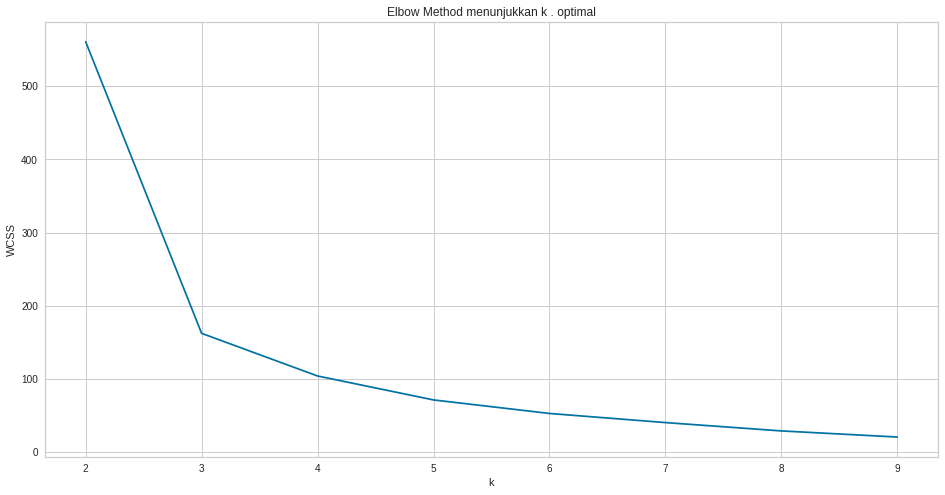

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Method menunjukkan k . optimal')
plt.show()

In [ ]:
print(distortions)

[560.6910738182048, 162.25425393170804, 103.99927784141514, 71.28952050979171, 52.809232279817074, 40.35596983489069, 28.95105809904741, 20.604606446454355]


In [ ]:
kmeanModel = KMeans(n_clusters=3, init='k-means++', max_iter=300)
kmeanModel.fit(x)

label = kmeanModel.predict(x)

print(label)

[2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1
 1 1 2 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 2 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1
 1 0 0 0 0 1 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1
 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1
 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0]


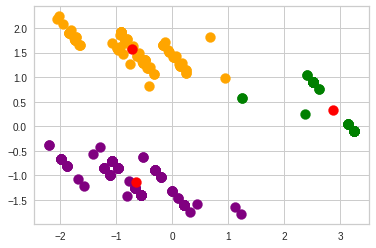

In [ ]:
#Visualising the clusters
plt.scatter(x[label == 0, 0], x[label == 0, 1], s = 100, c = 'purple', label = 'C1')
plt.scatter(x[label == 1, 0], x[label == 1, 1], s = 100, c = 'orange', label = 'C2')
plt.scatter(x[label == 2, 0], x[label == 2, 1], s = 100, c = 'green', label = 'C3')


#Plotting the centroids of the clusters
plt.scatter(kmeanModel.cluster_centers_[:, 0], kmeanModel.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.show()

Silhouetter Score: 0.697


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7955ebf650>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=3))

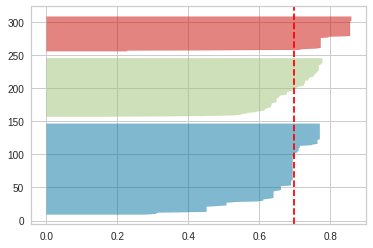

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x, label, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(kmeanModel, colors='yellowbrick')
visualizer.fit(x) 

In [ ]:
df['cluster'] = label
df.to_excel('K-means.xlsx')

files.download('K-means.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>